In [1]:
import pandas as pd

df = pd.read_parquet('./../data/aod_data_history.parquet')


In [2]:
from cmSim import utils

mcm_data = utils.get_mcm_data('./../data/aodsim_mcm_data.json')
df['pwg'] = df['dataset_name'].apply(
    utils.get_pwg_from_dataset, mcm_data=mcm_data)

df.head(None)


Unzipping and loading json file... Done


,dataset_name,dataset_id,replica_time_create,node_name,rep_size,min_time,max_time,br_user_group_id,tier,pwg
8,/Dijet_pThat-30_pPb-Bst_8p16_Pythia8/pPb816Sum...,1026084,20170502,T2_US_MIT,6.743652e+10,2019-01-01,2020-12-31,10.0,AODSIM,HIN
22,/BdToJpsiKs_SoftQCDnonD_TuneCP5_13TeV-pythia8-...,1580687,20201015,T2_US_Nebraska,2.856596e+09,2020-10-16,2020-12-31,18.0,AODSIM,BPH
32,/JpsiMM_5p02TeV_TuneCUETP8M1/HINppWinter16DR-7...,908169,20160804,T2_US_MIT,3.205466e+12,2019-01-01,2020-12-31,10.0,AODSIM,HIN
53,/UpsilonToTauTau_MuFilter_SoftQCDnonD_TuneCP5_...,1507811,20200706,T2_US_MIT,9.940632e+12,2020-07-06,2020-12-31,18.0,AODSIM,BPH
54,/SingleElectron/Run2016B-21Feb2020_ver2_UL2016...,1539121,20200517,T1_RU_JINR_Disk,1.303136e+12,2020-05-18,2020-12-31,42.0,AOD,None
...,...,...,...,...,...,...,...,...,...,...
6752616,/ZeroBias7/Run2017C-09Aug2019_UL2017_LowPU-v1/AOD,1569018,20200623,T2_US_Wisconsin,1.792918e+09,2020-08-04,2020-08-05,NaN,AOD,None
6752619,/SeesawTypeIII_M-700_2e_13TeV-TuneCP5-madgraph...,1576556,20200811,T2_US_Wisconsin,4.155618e+09,2020-09-30,2020-10-01,NaN,AODSIM,EXO
6752620,/QstarToGJ_M-8000_f-0p1_TuneCP2_13TeV-pythia8/...,1401295,20190717,T1_UK_RAL_Disk,5.405653e+09,2019-07-31,2019-07-31,NaN,AODSIM,EXO
6752622,/EWK_LLJJ_MLL_105-160_SM_5f_LO_TuneCP5_PSweigh...,1366906,20190716,T2_US_Nebraska,2.720065e+10,2019-08-02,2019-08-02,NaN,AODSIM,HIG


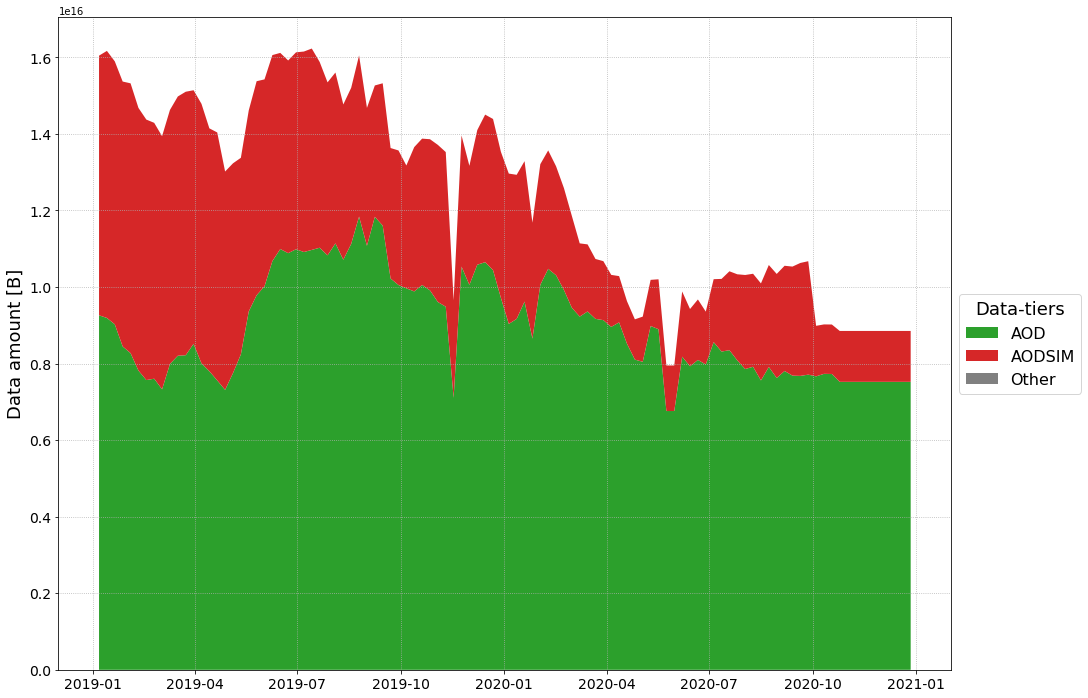

In [3]:
import pylab as plt
from cmSim.container import DataContainer

container = DataContainer.from_dataframe(df)

fig, ax = plt.subplots(figsize=(16, 12))
container.plot_storage_history_by_datatier(
    ax, datatiers=['AOD', 'AODSIM'], tier='T1', norm=False)


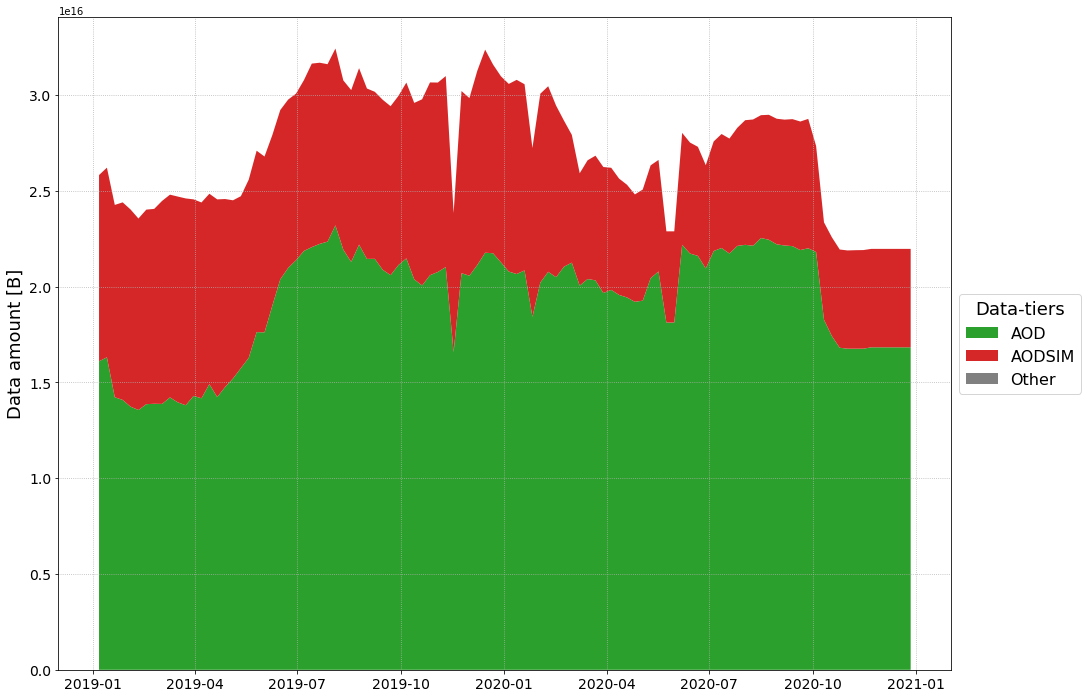

In [4]:
fig, ax = plt.subplots(figsize=(16, 12))
container.plot_storage_history_by_datatier(
    ax, datatiers=['AOD', 'AODSIM'], tier='T2', norm=False)


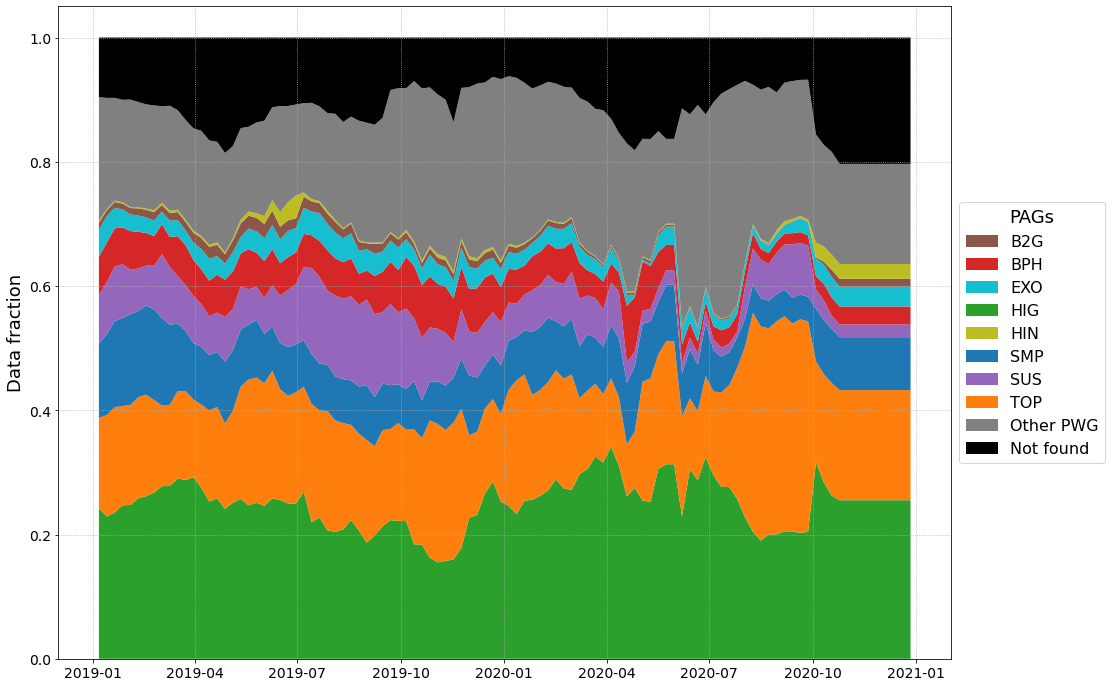

In [5]:
sim = df[df['tier'] == 'AODSIM']
pags = utils.get_pags()

container = DataContainer.from_dataframe(df=sim)

fig, ax = plt.subplots(figsize=(16, 12))
container.plot_storage_history_by_pag(ax, pags=pags, tier='T1', norm=True)


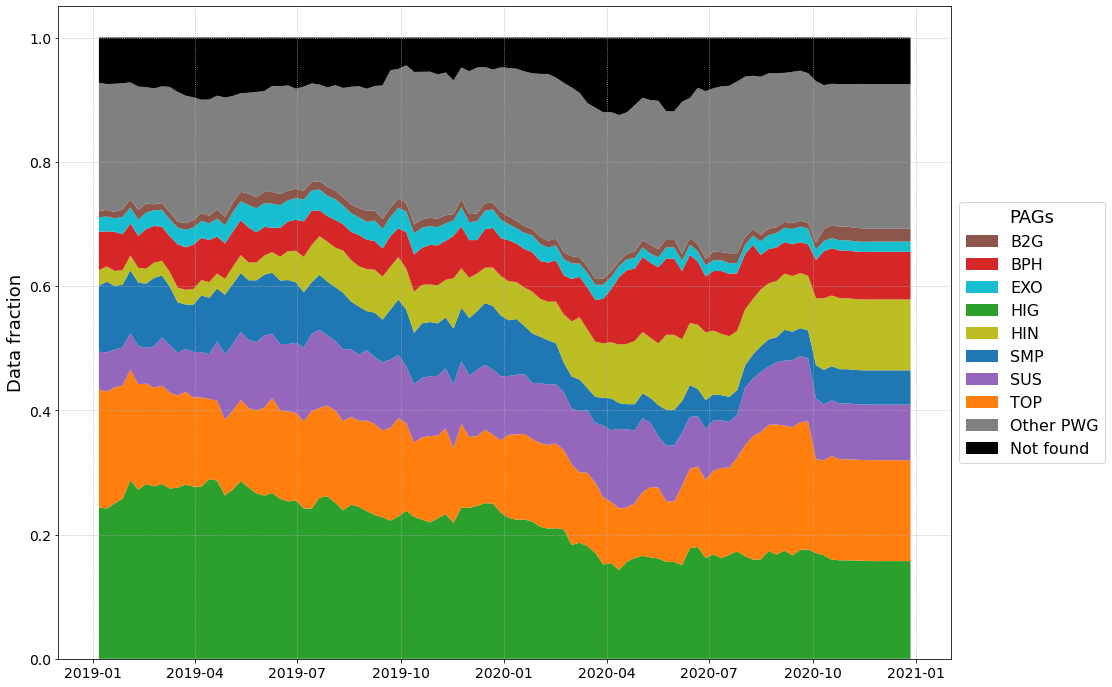

In [6]:
fig, ax = plt.subplots(figsize=(16, 12))
container.plot_storage_history_by_pag(ax, pags=pags, tier='T2', norm=True)
